# Lead Score - Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 1. Import Libraries

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Reading Dataset and Understanding Data

In [7]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity       Country             Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags       Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile                City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                  0.00  Page Visited on Website           NaN                     Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses   Low in Relevance                                No                        No          Select              Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1     2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                  2.50             Email Opened         India                     Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing                NaN                                No                        No          Select              Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                  2.00             Email Opened         India    Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email           Might be                                No                        No  Potential Lead              Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                  1.00              Unreachable         India      Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No           

In [8]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [9]:
#To get an idea of the numeric values
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

In [10]:
# get entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observsation:
As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## 3. Cleaning Data

In [13]:
# Converting all the values to lower case
df1 = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [14]:
# Finding column names in which 'Select' level is available:-

cols=list(df1.columns)
for i in cols:
    if 'select' in df1[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


##### Observation
We found that column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' having 'Select' level.Which means the customer had not selected option while filling form.So it is better to impute will 'Null' values.

In [16]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df1 = df1.replace('select',np.NaN)

In [17]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As it is  clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful.Let's eliminate the columns having greater than 40% missing values as they are of no use to us.

In [19]:
col_missing_percent=pd.DataFrame(round(100*(df1.isnull().sum()/len(df1.index)), 2))
high_miss_col=[]
col_missing_percent=col_missing_percent.reset_index()
for i in range(len(col_missing_percent)):
    if col_missing_percent.iloc[i,1] > 40 :
     # print(col_missing_percent.iloc[i,0])
       high_miss_col.append(col_missing_percent.iloc[i,0])
print(high_miss_col)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [20]:
# Removing all the columns that are no required and have 40% null values
df1=df1.drop(high_miss_col, axis=1)

In [21]:
df1.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags Update me on Supply Chain Content Get updates on DM Content    City I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api      olark chat           no          no          0          0.0                            0                   0.0  page visited on website     NaN                      NaN                      unemployed                       better career prospects     no       no                no                 no        no                    no                      no                                     no          interested in other courses                                no                        no     NaN                                       no                                     no              modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api  organic search           no          no          0          5.0                          674                   2.5             email opened   india                      NaN                      unemployed                       better career prospects     no       no                no                 no        no                    no                      no                                     no                              ringing                                no                        no     NaN                                       no                                     no          email opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission  direct traffic           no          no          1          2.0                         1532                   2.0             email opened   india  business administration                         student                       better career prospects     no       no                no                 no        no                    no                      no                                     no  will revert after reading the email                                no                        no  mumbai                                       no                                    yes          email opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission  direct traffic           no          no          0          1.0                          305                   1.0              unreachable   india    media and advertising                      unemployed                       better career prospects     no       no                no                 no        no                    no                      no                                     no                              ringing                                no                        no  mumbai                                       no                                     no              modified
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission          google           no          no          1          2.0                         1428                   1.0        converted to lead   india                      NaN                      unemployed                       better career prospects     no       no                no                 no        no                    no                      no                                     no  will revert after reading the email                                no                        no  mumbai                     

#### Observation:
Clearly the variables 'Prospect ID' and 'Lead Number' won't be of any use in the analysis, so it's best that we drop these two variables.

In [23]:
df1.drop(['Prospect ID','Lead Number'], inplace=True, axis=1)

In [24]:
# Checking if there are columns with one unique value since it won't affect our analysis
col_nunique_values=pd.DataFrame(df1.nunique())
uniq_col=[]
col_nunique_values=col_nunique_values.reset_index()
for i in range(len(col_nunique_values)):
    if col_nunique_values.iloc[i,1] == 1 :
     # print(col_missing_percent.iloc[i,0])
       uniq_col.append(col_nunique_values.iloc[i,0])
print(uniq_col)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [25]:
# Dropping unique valued columns
df2= df1.drop(uniq_col,axis=1)
df2.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [26]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Observation:
There are seven columns that still have high null values: Country, Specialization,What is your current occupation, What matters most to you in choosing a course, Tags and City. We will look at them individually to see what can be done

In [28]:
# Check Country
df2['Country'].value_counts()

Country
india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
nigeria                    4
germany                    4
canada                     4
sweden                     3
italy                      2
belgium                    2
ghana                      2
philippines                2
netherlands                2
china                      2
asia/pacific region        2
bangladesh                 2
uganda                     2
russia                     1
sri lanka                  1
tanzania                   1
kenya                      1
malaysia                   1
liberia                    1
denmar

##### Observation: 
The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [30]:
df2.drop(['Country'], inplace=True, axis=1)

In [31]:
#Check 'What is your current occupation'
df2['What is your current occupation'].value_counts()

What is your current occupation
unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: count, dtype: int64

We see that 'Unemployed' count is highest but we will impute missing values with 'other' considering we do not know current occupation of lead.

In [33]:
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('other')


In [34]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags      

In [35]:
# Check Specialization
df2['Specialization'].value_counts()

Specialization
finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
media and advertising                203
travel and tourism                   203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: count, dtype: int64

Observation:

The column 'Specialization' has a lot of null values. Because this column is important for analysis so I decided to replace them with 'not_provided

In [37]:
df2['Specialization'] = df2['Specialization'].fillna('not_provided')

In [38]:
# Check 'What matters most to you in choosing a course'
df2['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
better career prospects      6528
flexibility & convenience       2
other                           1
Name: count, dtype: int64

##### Observation: 
The distribution of the data is very heavily skewed, with "Better Career Prospects" + null value ~99%. It is safe to drop this column.

In [40]:
df2.drop(['What matters most to you in choosing a course'], inplace=True, axis=1)

In [41]:
# Check 'Tags'
df2['Tags'].value_counts()

Tags
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to o

#### Observation:
Tags are created by the sales team after contacting the leads. It has high missing rows so we can drop these columns.


In [43]:
df2.drop(['Tags'], inplace=True, axis=1)

In [44]:
# Check 'City'
df2['City'].value_counts()

City
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: count, dtype: int64

#### Observation:
- City column have high missing values and if we will impute mode or most frequent value for missing value then our data will be some what biased. Beside that, there is no useful information here so better to drop it.

In [46]:
df2.drop(['City'], inplace=True, axis=1)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

#### Observation: 
- Some low missing values such as: Lead Source, Last Activity --> we can replace by mode (because they are categoricial variables)
-  Some low missing values such as: TotalVisits, Page Views Per Visit --> we can replace by median (because they are numerical variables)

In [49]:
#Check 'Lead Source':
df2['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
social media            2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

In [50]:
#Check 'Last Activity':

df2['Last Activity'].value_counts()

Last Activity
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email marked spam                  2
email received                     2
resubscribed to emails             1
visited booth in tradeshow         1
Name: count, dtype: int64

In [51]:
# Replace null rows with mode for 'Lead Source' and 'Last Activity'

df2['Lead Source'] = df2['Lead Source'].fillna(df2['Lead Source'].mode()[0])
df2['Last Activity']= df2['Last Activity'].fillna(df2['Last Activity'].mode()[0])



In [52]:
# Replace missing value = median value for TotalVisits,Page Views Per Visit 

df2['TotalVisits'] = df2['TotalVisits'].fillna(df2['TotalVisits'].median())
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].fillna(df2['Page Views Per Visit'].median())



In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

#### Observation:
Now all missing data are treated. We can process to EDA part.

## 4. EDA

### 4.1 Univariate Analysis

#### Categorical Variables

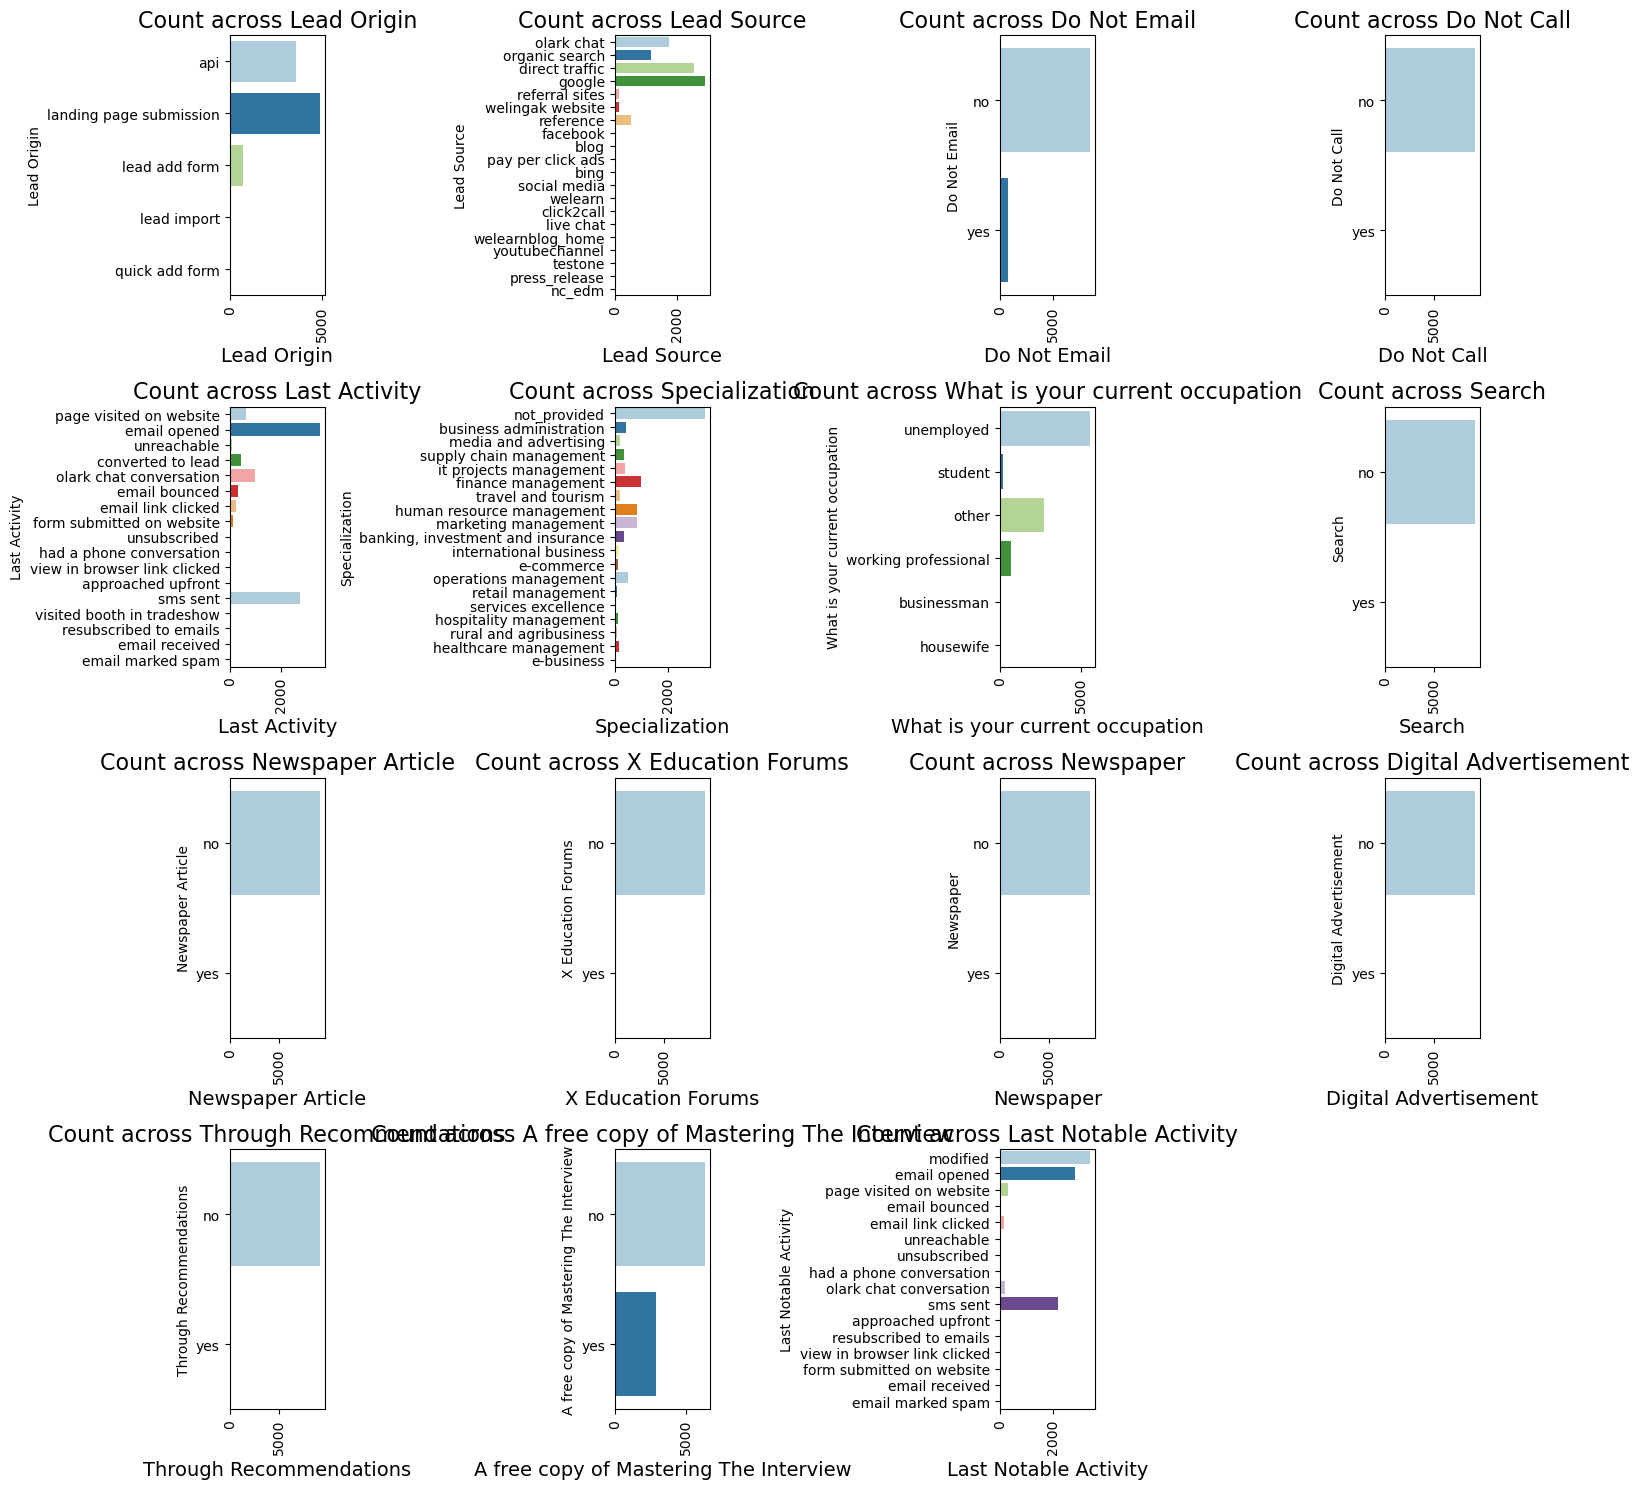

In [58]:
def countplot(x, fig):
    plt.subplot(4,4, fig)
    sns.countplot(df2[x],palette="Paired")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,15))

col_list = df2.select_dtypes(include=['object']).columns.to_list()

for i in range(len(col_list)):
    countplot(col_list[i],i+1)

plt.tight_layout()

#### Observation:
- There were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.


In [60]:
# Drop single value columns
df2.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],inplace=True, axis=1)


#### Numerical Variables

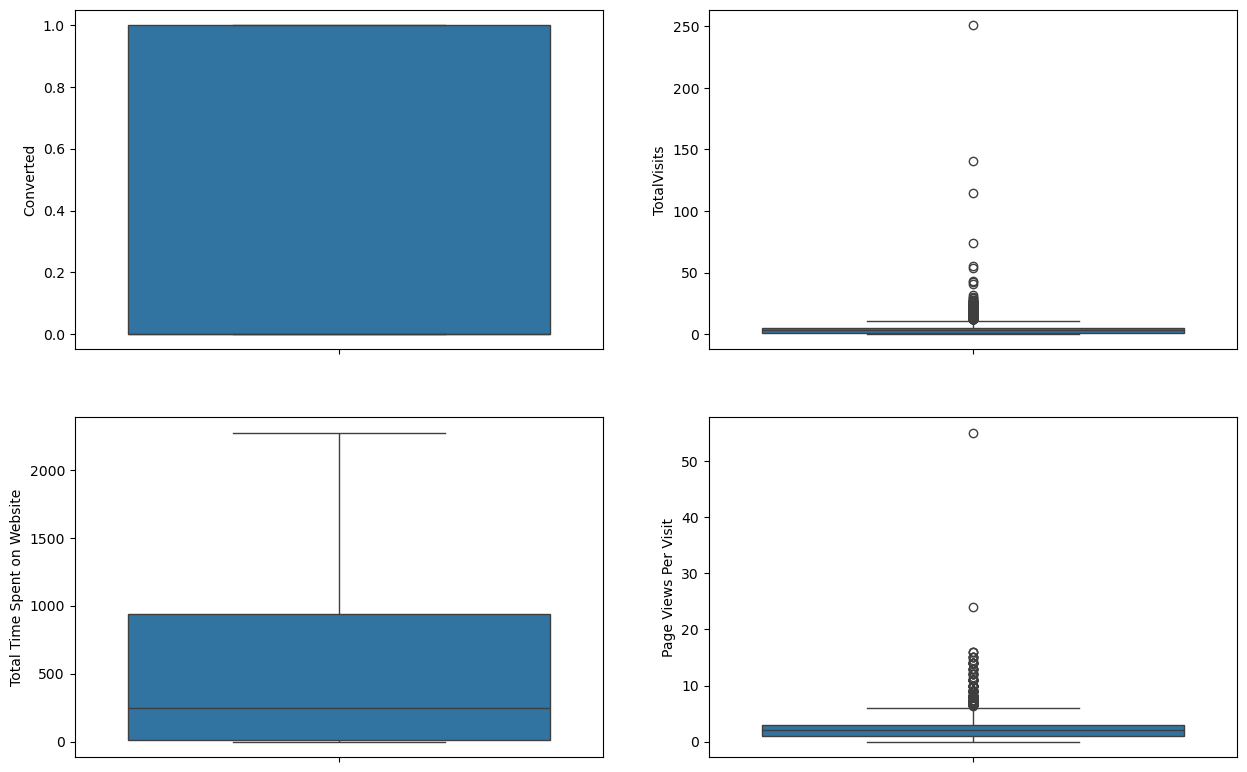

In [62]:
# Plotting box plots to visualize data distribution of all numerical variables
col_num = df2.select_dtypes(include=['float64','int64']).columns.to_list()

plt.figure(figsize=(15,15))

i = 1
for col in col_num:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, data=df2)
    i+=1

Observation:

There are some outliers with 'TotalVisits' and 'Page Views Per Visit' however we will keep them for later check with RFE & VIF

### 4.2 Bivariate Analysis

#### Check Categorical variables and target variable

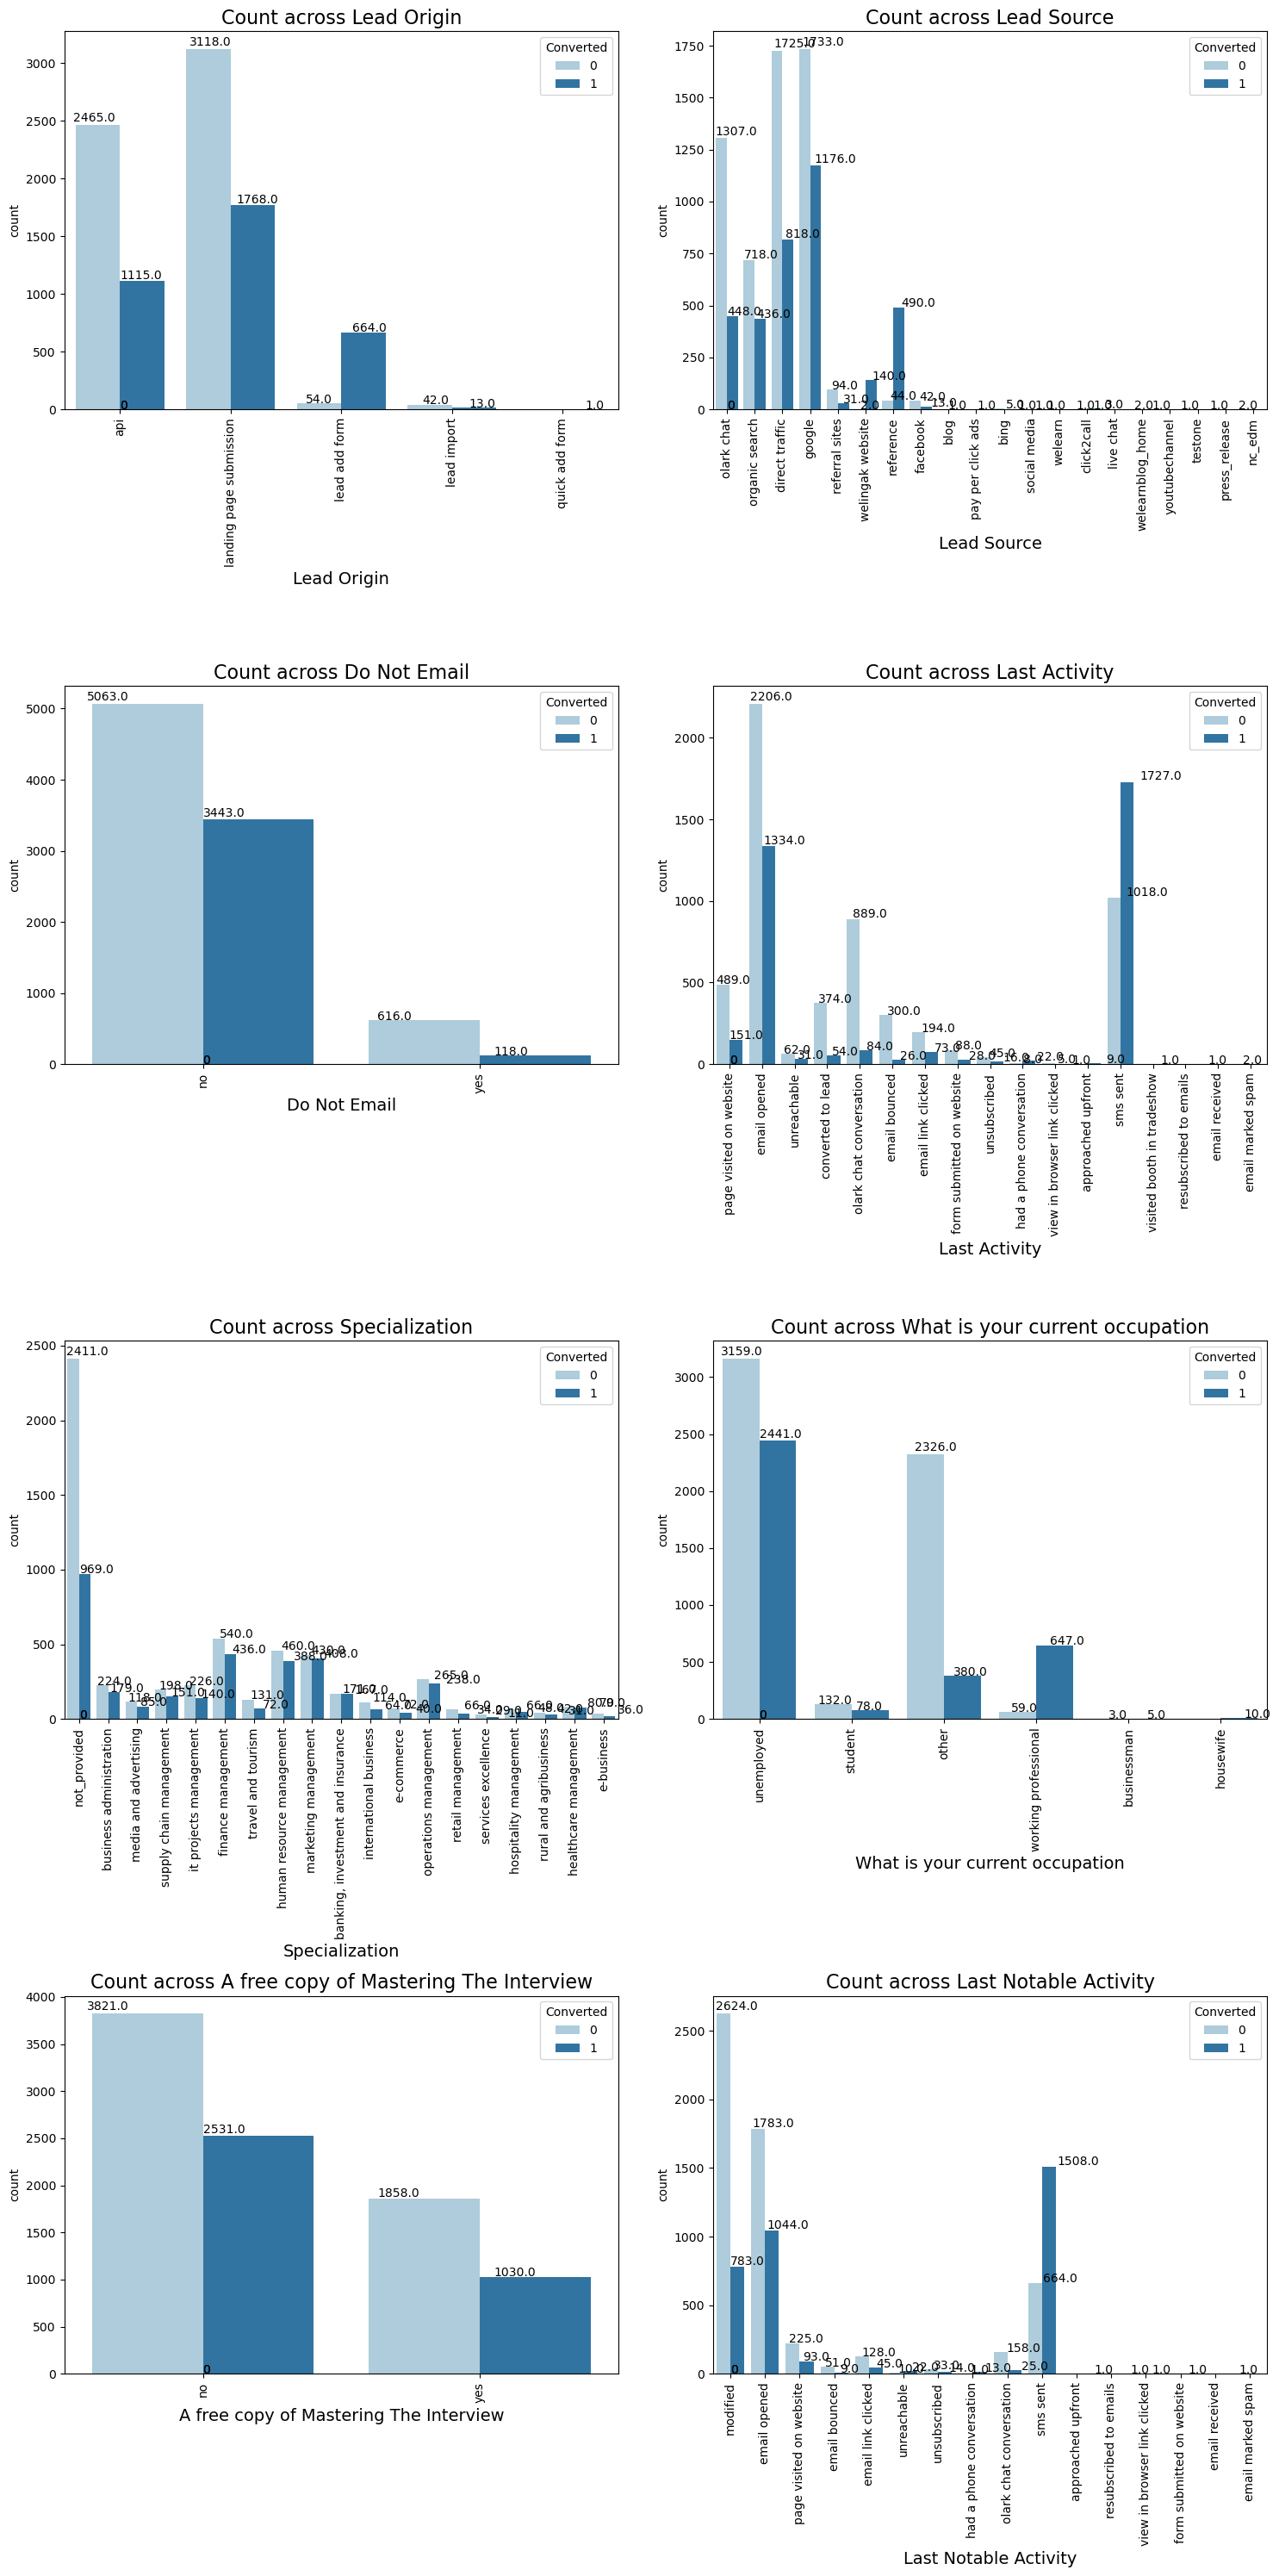

In [66]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    ax=sns.countplot(x=df2[x],hue=df2['Converted'],palette="Paired")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05 , p.get_height() * 1.01))

plt.figure(figsize=(15,30))

col_list = df2.select_dtypes(include=['object']).columns.to_list()

for i in range(len(col_list)):
    countplot(col_list[i],i+1)

plt.tight_layout()

#### Observation

##### From above plots we can observe and calculate that :
- Lead Origin:
    + Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
    + For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
    + Count of 'Lead Import' is lesser.
- Lead Source:
    + Google and Direct traffic generate maximum number of leads.
    + Conversion rate of 'Reference' and 'Welingak Website' leads is high.
- Do not email:
    + People who haven't opted for mail option are becoming more leads (68%).
- Last activity & Last Notable Activity:
    + 'SMS Sent' has highest conversion rate.
    + Highest last activity of leads is 'Email Opened' .
- What is your current occupation:
    + 'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
    + Conversion rate is higher for 'Working Professionals' .
- Specialization:
    + 'Management' specialization altogether having more number of leads generating.And not_provided category is also generating more number of leads.
  
##### Recommendation
- Lead Origin:
    + To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form
- Lead Source:
    + To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
  

#### Check Numerical variables and target variable

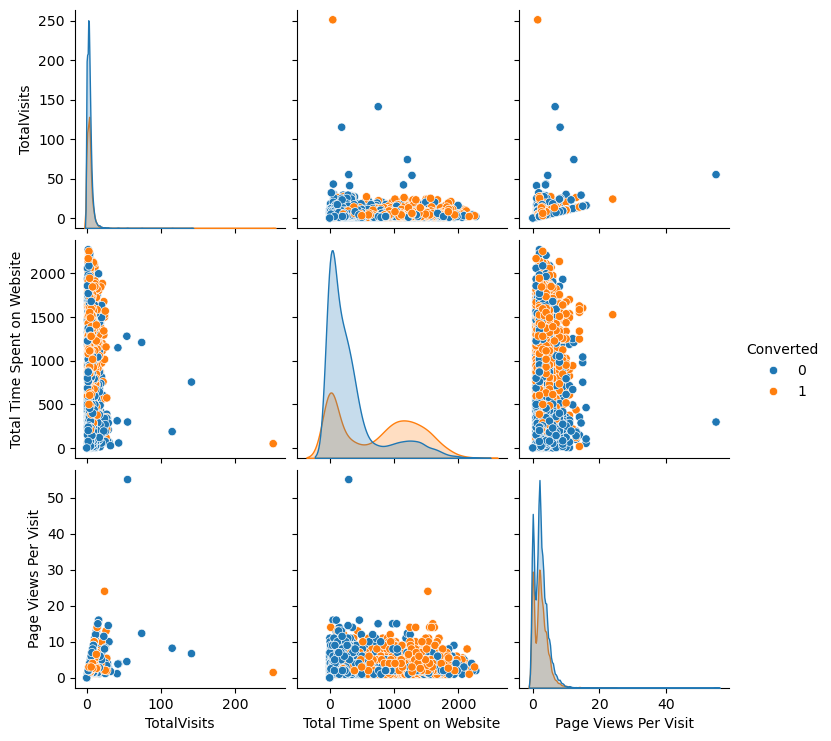

In [69]:
# Check pairplot for continuous variables
sns.pairplot(df2,diag_kind='kde',hue='Converted')
plt.show()

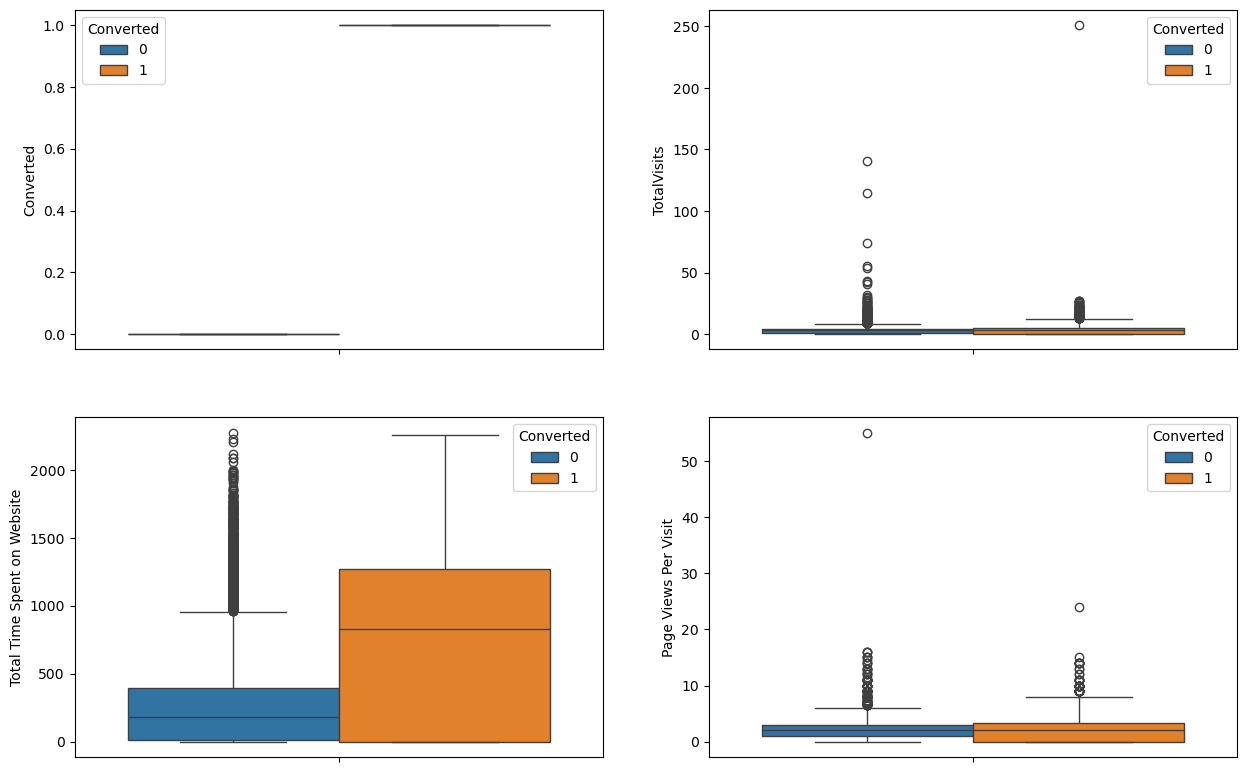

In [70]:
# Draw box plots for indepent variables with continuous values
#col1 = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
col_num = df2.select_dtypes(include=['float64','int64']).columns.to_list()

plt.figure(figsize=(15,15))

i = 1
for col in col_num:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, data=df2,hue='Converted')
    i+=1

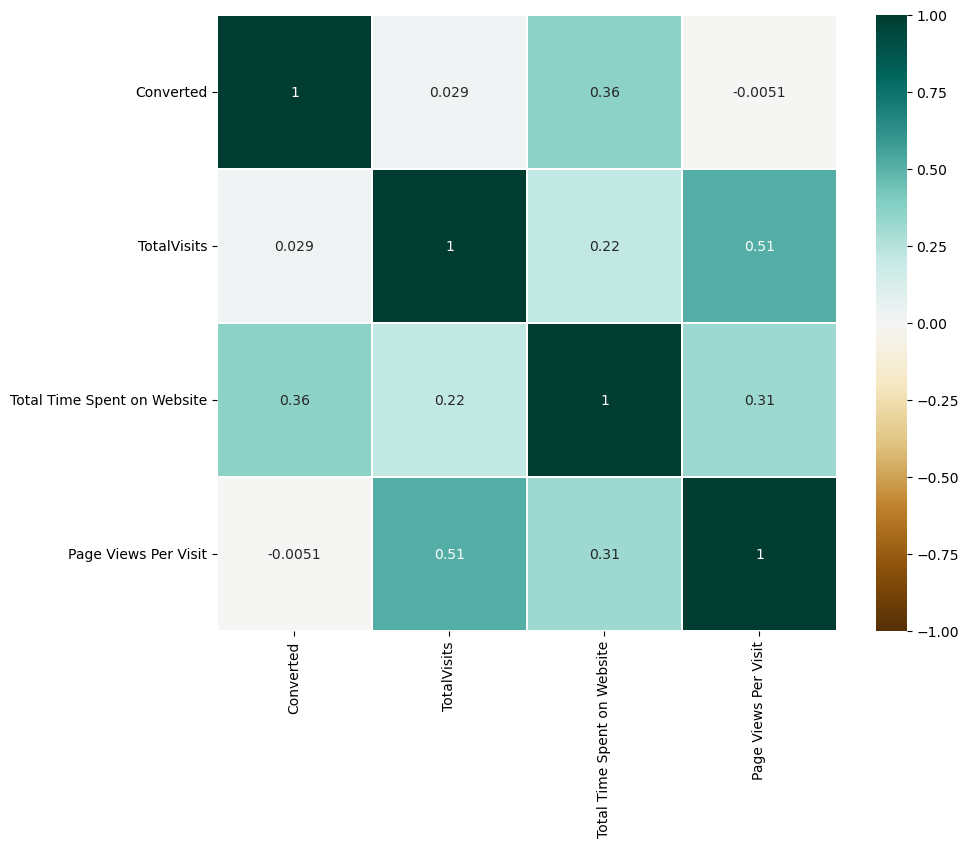

In [71]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df2[col_num].corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

#### Observation : No high correlation

- 'TotalVisits' and 'Page Views per Visit' are correlated with correlation of .51
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [74]:

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df2[col_num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.438636                   487.698268              2.357440
std       0.486714     4.819024                   548.021466              2.145781
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     1.000000                    12.000000              1.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
90%       1.000000     7.000000                  1380.000000              5.000000
95%       1.000000    10.000000                  1562.000000              6.000000
99%       1.000000    17.000000                  1840.610000              9.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [75]:
df2.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation A free copy of Mastering The Interview Last Notable Activity
0                      api      olark chat           no          0          0.0                            0                   0.0  page visited on website             not_provided                      unemployed                                     no              modified
1                      api  organic search           no          0          5.0                          674                   2.5             email opened             not_provided                      unemployed                                     no          email opened
2  landing page submission  direct traffic           no          1          2.0                         1532                   2.0             email opened  business administration                         student                                    yes          email opened
3  landing page submission  direct traffic           no          0          1.0                          305                   1.0              unreachable    media and advertising                      unemployed                                     no              modified
4  landing page submission          google           no          1          2.0                         1428                   1.0        converted to lead             not_provided                      unemployed                                     no              modified

## 5. Data Preparation for Model Training

### 5.1. Create Dummy Variables

In [78]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','A free copy of Mastering The Interview','Last Notable Activity']],dtype='int', drop_first=True)

#I want to drop Specialization_not_provided and What is your current occupation_other when creating dummy values because they're converted from 'Select'
dummy2 = pd.get_dummies(df2[['Specialization','What is your current occupation']],dtype='int')
dummy2 = dummy2.drop(['Specialization_not_provided','What is your current occupation_other'], axis=1)
# Adding the results to the master dataframe
df_final = pd.concat([df2, dummy1], axis=1)
df_final = pd.concat([df_final,dummy2],axis=1)


In [79]:
# We have created dummies for the below variables, so we can drop them
df_final = df_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity'], axis=1)


In [80]:
df_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_landing page submission  Lead Origin_lead add form  Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  Lead Source_pay per click ads  Lead Source_press_release  Lead Source_reference  Lead Source_referral sites  Lead Source_social media  Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  Last Activity_converted to lead  Last Activity_email bounced  Last Activity_email link clicked  Last Activity_email marked spam  Last Activity_email opened  Last Activity_email received  Last Activity_form submitted on website  Last Activity_had a phone conversation  Last Activity_olark chat conversation  \
0          0          0.0                            0                   0.0                                    0                          0                        0                           0                 0                       0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0   
1          0          5.0                          674                   2.5                                    0                          0                        0                           0                 0                       0                           0                     0                   0                      0                   0                       0                           1                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0   
2          1          2.0                         1532                   2.0                                    1                          0                        0                           0                 0                       0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0   
3          0          1.0  

### 5.2. Test-Train Split

In [82]:
# Putting feature variable to X
X = df_final.drop(['Converted'], axis=1)
y = df_final['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.3 Feature Scaling

In [84]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_landing page submission  Lead Origin_lead add form  Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  Lead Source_pay per click ads  Lead Source_press_release  Lead Source_reference  Lead Source_referral sites  Lead Source_social media  Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  Last Activity_converted to lead  Last Activity_email bounced  Last Activity_email link clicked  Last Activity_email marked spam  Last Activity_email opened  Last Activity_email received  Last Activity_form submitted on website  Last Activity_had a phone conversation  Last Activity_olark chat conversation  \
1871     0.000000                     0.000000              0.000000                                    0                          0                        0                           0                 0                       0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0   
6795     0.015936                     0.214349              0.024182                                    1                          0                        0                           0                 0                       0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0   
3516     0.019920                     0.046655              0.045455                                    0                          0                        0                           0                 0                       0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0   
8105     0.019920                     0.541373              0.

In [85]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  6468.000000           6468.000000                  6468.000000
mean      0.013815              0.042686                     0.212974
std       0.021048              0.039326                     0.240566
min       0.000000              0.000000                     0.000000
25%       0.003984              0.018182                     0.005282
50%       0.011952              0.036364                     0.108275
75%       0.019920              0.054545                     0.407790
max       1.000000              1.000000                     1.000000

In [86]:
### Checking the Churn Rate
convert = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
convert

38.53896103896104

We have almost 38.5% churn rate

### 5.4 Looking at Correlations

In [89]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

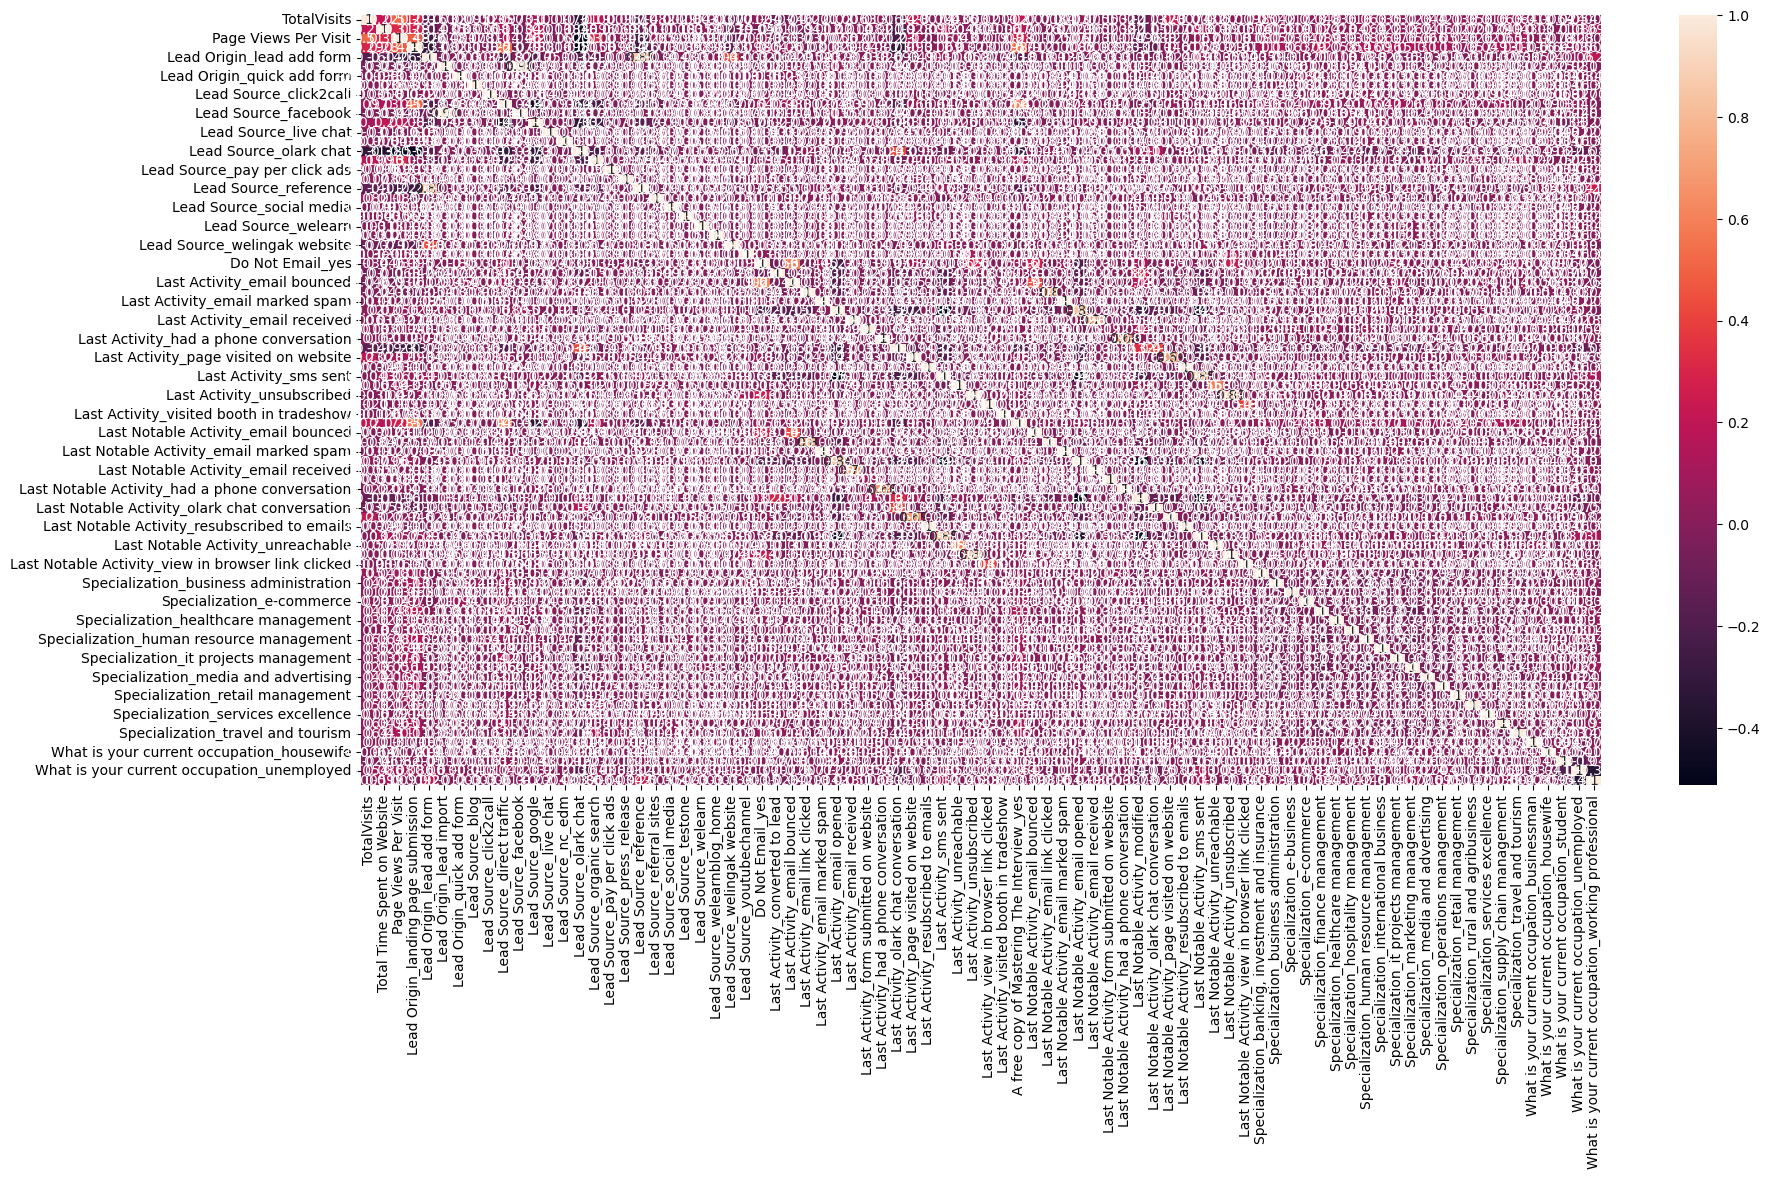

In [90]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

<font color= green>___Since there are a lot of variables.It is difficult to drop variable. We'll do it after RFE___</font>

## 6.Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### 6.1. Using RFE and Automated approach
#### Use RFE to eliminate some column

In [94]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [96]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 8),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 43),
 ('Lead Origin_quick add form', False, 47),
 ('Lead Source_blog', False, 48),
 ('Lead Source_click2call', False, 37),
 ('Lead Source_direct traffic', False, 29),
 ('Lead Source_facebook', False, 28),
 ('Lead Source_google', False, 32),
 ('Lead Source_live chat', False, 56),
 ('Lead Source_nc_edm', False, 38),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 30),
 ('Lead Source_pay per click ads', False, 49),
 ('Lead Source_press_release', False, 54),
 ('Lead Source_reference', False, 62),
 ('Lead Source_referral sites', False, 31),
 ('Lead Source_social media', False, 44),
 ('Lead Source_testone', False, 68),
 ('Lead Source_welearn', False, 46),
 ('Lead Source_welearnblog_home', False, 53),
 ('Lead Source_welingak website

In [97]:
# Put all the columns selected by RFE in the variable 'col'
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_lead add form', 'Lead Source_olark chat', 'Lead Source_welingak website', 'Do Not Email_yes', 'Last Activity_converted to lead', 'Last Activity_email bounced', 'Last Activity_olark chat conversation', 'Last Activity_sms sent', 'Last Notable Activity_email bounced', 'Last Notable Activity_had a phone conversation', 'Last Notable Activity_unreachable', 'What is your current occupation_housewife', 'What is your current occupation_working professional'], dtype='object')

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [99]:
# Selecting columns selected by RFE
X_train = X_train[rfe_col]

### 6.2 Build model using manual feature elimination


#### Model 1

In [102]:
# Importing statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.3
Date:                Mon, 21 Oct 2024   Deviance:                       5460.6
Time:                        20:14:13   Pearson chi2:                 7.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4808      0.082    -30.266      0.000      -2.641      -2.320
TotalVisits                                              5.2773      1.817      2.905      0.004       1.717       8.838
Total Time Spent on Website                              4.5342      0.162     27.963      0.000       4.216       4.852
Lead Origin_lead add form                                3.7380      0.192     19.426      0.000       3.361       4.115
Lead Source_olark chat                                   1.2574      0.106     11.844      0.000       1.049       1.465
Lead Source_welingak website                             1.8887      0.742      2.546      0.011       0.435       3.342
Do Not Email_yes                                        -1.2386      0.190     -6.518      0.000      -1.611      -0.866
Last Activity_converted to lead                         -1.1688      0.220     -5.311      0.000      -1.600      -0.737
Last Activity_email bounced                             -1.4042      0.426     -3.298      0.001      -2.239      -0.570
Last Activity_olark chat conversation                   -1.3727      0.164     -8.387      0.000      -1.693      -1.052
Last Activity_sms sent                                   1.2309      0.074     16.688      0.000       1.086       1.376
Last Notable Activity_email bounced                      1.8547      0.604      3.073      0.002       0.672       3.038
Last Notable Activity_had a phone conversation           3.5658      1.098      3.249      0.001       1.414       5.717
Last Notable Activity_unreachable                        1.7974      0.514      3.498      0.000       0.790       2.805
What is your current occupation_housewife               23.0050   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_working professional     2.8478      0.187     15.240      0.000       2.482       3.214
========================================================================================================================
"""

 There is a variable which has a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

##### Checking `VIF`

In [105]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                         Last Activity_email bounced  1.97
5                                    Do Not Email_yes  1.82
1                         Total Time Spent on Website  1.59
9                              Last Activity_sms sent  1.43
3                              Lead Source_olark chat  1.41
8               Last Activity_olark chat conversation  1.39
2                           Lead Origin_lead add form  1.38
0                                         TotalVisits  1.35
4                        Lead Source_welingak website  1.24
10                Last Notable Activity_email bounced  1.21
14  What is your current occupation_working profes...  1.18
6                     Last Activity_converted to lead  1.02
13          What is your current occupation_housewife  1.01
12                  Last Notable Activity_unreachable  1.00
11     Last Notable Activity_had a phone conversation  1.00

<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_housewife'___</font>

In [107]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

#### Model 2

In [109]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.6
Date:                Mon, 21 Oct 2024   Deviance:                       5475.1
Time:                        20:14:14   Pearson chi2:                 7.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4685      0.082    -30.239      0.000      -2.628      -2.308
TotalVisits                                              5.1804      1.803      2.872      0.004       1.646       8.715
Total Time Spent on Website                              4.5303      0.162     27.973      0.000       4.213       4.848
Lead Origin_lead add form                                3.7521      0.192     19.541      0.000       3.376       4.128
Lead Source_olark chat                                   1.2490      0.106     11.787      0.000       1.041       1.457
Lead Source_welingak website                             1.8667      0.742      2.517      0.012       0.413       3.320
Do Not Email_yes                                        -1.2417      0.190     -6.535      0.000      -1.614      -0.869
Last Activity_converted to lead                         -1.1782      0.220     -5.357      0.000      -1.609      -0.747
Last Activity_email bounced                             -1.4133      0.426     -3.317      0.001      -2.249      -0.578
Last Activity_olark chat conversation                   -1.3779      0.164     -8.422      0.000      -1.699      -1.057
Last Activity_sms sent                                   1.2220      0.074     16.588      0.000       1.078       1.366
Last Notable Activity_email bounced                      1.8589      0.604      3.079      0.002       0.675       3.042
Last Notable Activity_had a phone conversation           3.5568      1.098      3.241      0.001       1.406       5.708
Last Notable Activity_unreachable                        1.7884      0.514      3.481      0.001       0.781       2.795
What is your current occupation_working professional     2.8419      0.187     15.210      0.000       2.476       3.208
========================================================================================================================
"""

In [110]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                         Last Activity_email bounced  1.97
5                                    Do Not Email_yes  1.82
1                         Total Time Spent on Website  1.59
9                              Last Activity_sms sent  1.43
3                              Lead Source_olark chat  1.41
8               Last Activity_olark chat conversation  1.39
2                           Lead Origin_lead add form  1.37
0                                         TotalVisits  1.35
4                        Lead Source_welingak website  1.24
10                Last Notable Activity_email bounced  1.21
13  What is your current occupation_working profes...  1.18
6                     Last Activity_converted to lead  1.02
11     Last Notable Activity_had a phone conversation  1.00
12                  Last Notable Activity_unreachable  1.00

<font color= green>___The VIF values seem fine and the p-values are below 0.05. Therefore, Model 2 is selected as Final Model ____</font>

In [113]:
##### Get latest columns for final models
final_col=X_train.columns
final_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_lead add form', 'Lead Source_olark chat', 'Lead Source_welingak website', 'Do Not Email_yes', 'Last Activity_converted to lead', 'Last Activity_email bounced', 'Last Activity_olark chat conversation', 'Last Activity_sms sent', 'Last Notable Activity_email bounced', 'Last Notable Activity_had a phone conversation', 'Last Notable Activity_unreachable', 'What is your current occupation_working professional'], dtype='object')

## 7 Making prediction on 'train' dataset based on final model


In [115]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.228040
6795    0.195472
3516    0.288054
8105    0.787408
3934    0.228040
4844    0.990742
3297    0.103912
8071    0.992365
987     0.119104
7423    0.873480
dtype: float64

In [116]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22803995, 0.19547241, 0.28805353, 0.78740831, 0.22803995,
       0.99074191, 0.10391181, 0.99236546, 0.11910409, 0.87348042])

In [117]:
### Creating a dataframe with the actual conversion flag and the predicted probabilities
# Covert probabilities to lead scores from 0 to 100
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predict_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Predict_Prob
0          0      0.228040
1          0      0.195472
2          0      0.288054
3          0      0.787408
4          0      0.228040

### 7.1 Let'a try to choose 0.5 as Cutoff

In [119]:
### Creating new column 'Predicted' with 1 if Predict_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Predict_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Predict_Prob  Predicted
0          0      0.228040          0
1          0      0.195472          0
2          0      0.288054          0
3          0      0.787408          1
4          0      0.228040          0

#### Creating the `Confusion matrix`

In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3517  485]
 [ 732 1734]]


In [122]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8118429189857761


In [123]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7031630170316302

In [125]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8788105947026487

#### Observation:
- Accuracy : 81.2%
- Sensitivity: 70.3%
- Specificity: 87.9%

### 7.2 Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, We need to optimise the threshold. Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [128]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predict_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0      0.228040          0    1    1    1    0    0    0    0    0    0    0
1          0      0.195472          0    1    1    0    0    0    0    0    0    0    0
2          0      0.288054          0    1    1    1    0    0    0    0    0    0    0
3          0      0.787408          1    1    1    1    1    1    1    1    1    0    0
4          0      0.228040          0    1    1    1    0    0    0    0    0    0    0

In [129]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588126  0.970803  0.352324
0.2   0.2  0.727273  0.923358  0.606447
0.3   0.3  0.795609  0.832117  0.773113
0.4   0.4  0.812307  0.761963  0.843328
0.5   0.5  0.811843  0.703163  0.878811
0.6   0.6  0.792826  0.584347  0.921289
0.7   0.7  0.778448  0.506894  0.945777
0.8   0.8  0.744898  0.379562  0.970015
0.9   0.9  0.713822  0.268045  0.988506


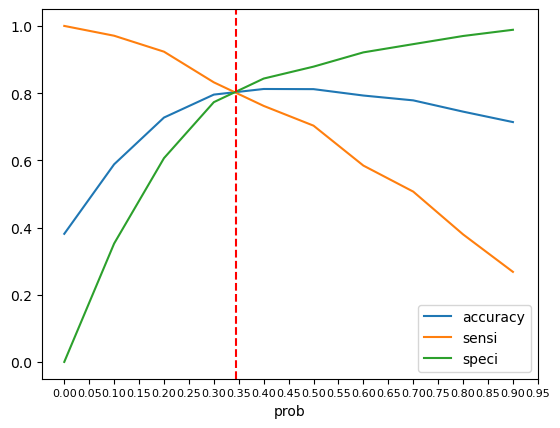

In [130]:

#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.345, color='r', linestyle='--') # additing axline

plt.show()

As you can see that around `0.345, you get the optimal values of the three metrics. So let's choose 0.345 as our cutoff now.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Predict_Prob.map( lambda x: 1 if x > 0.345 else 0)

y_train_pred_final.head()

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0          0      0.228040          0    1    1    1    0    0    0    0    0    0    0                0
1          0      0.195472          0    1    1    0    0    0    0    0    0    0    0                0
2          0      0.288054          0    1    1    1    0    0    0    0    0    0    0                0
3          0      0.787408          1    1    1    1    1    1    1    1    1    0    0                1
4          0      0.228040          0    1    1    1    0    0    0    0    0    0    0                0

### 7.3 Model Evaluation

In [134]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8070500927643784

In [135]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3241,  761],
       [ 487, 1979]])

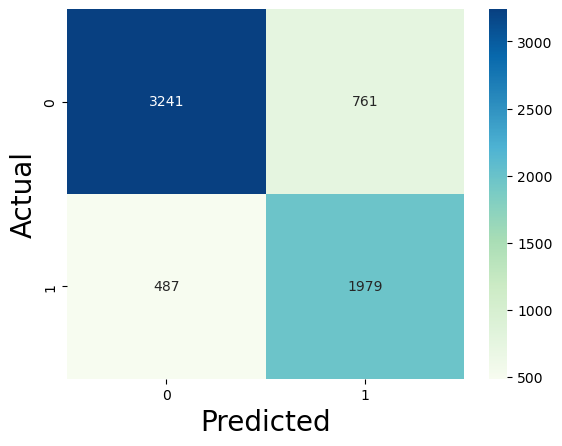

In [136]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [137]:
# Let's evaluate the other metrics as well

TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [138]:
# Calculating the 'Sensitivity'

TP2/(TP2+FN2)

0.8025141930251419

In [139]:
# Calculating the 'Specificity'

TN2/(TN2+FP2)

0.8098450774612693

In [140]:
# Negative predictive value

TN2 /(TN2+ FN2)

0.8693669527896996

In [141]:
# Calculating the 'Precision' /positive predictive value :
TP2/(TP2+FP2)

0.7222627737226277

In [142]:
#Calculating the 'Recall'
TP2/(TP2+FN2)

0.8025141930251419

#### Observation: With this cutoff (0.345) for train data
- Accuracy : 80.7%
- Sensitivity: 80.3%
- Specificity: 81%
- Precision: 72.2%
- Recall: 80.3%.
  
This cutoff point seems good to go!

## 8. Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [146]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Predict_Prob, 
                                         drop_intermediate=False)

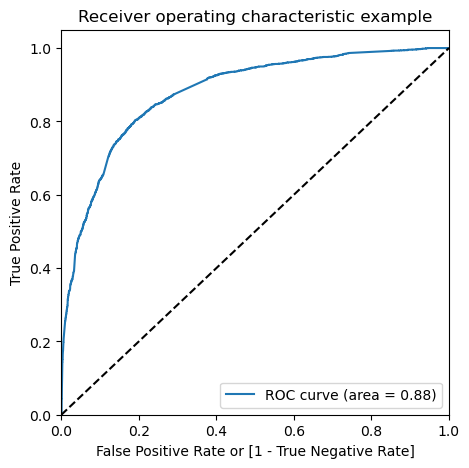

In [148]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predict_Prob)

The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Precision and recall tradeoff

In [151]:
### Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predict_Prob)

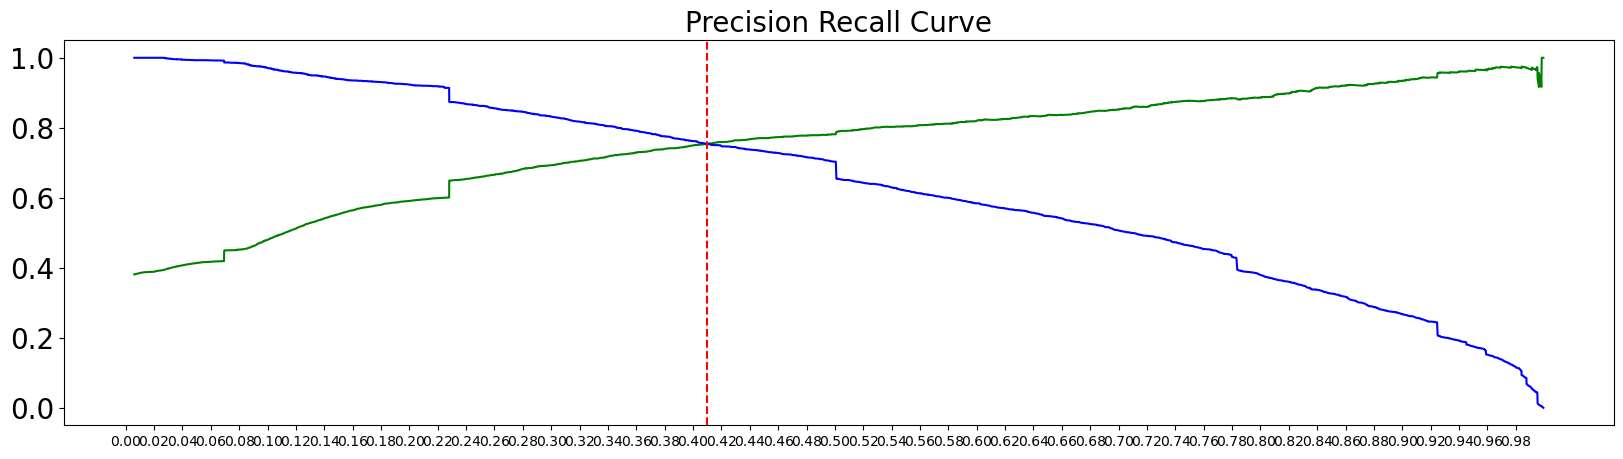

In [152]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.41, color='r', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

In [153]:
# plotting the Train dataset again with 0.41 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Predict_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  final_predicted_2
0          0      0.228040          0    1    1    1    0    0    0    0    0    0    0                0                  0
1          0      0.195472          0    1    1    0    0    0    0    0    0    0    0                0                  0
2          0      0.288054          0    1    1    1    0    0    0    0    0    0    0                0                  0
3          0      0.787408          1    1    1    1    1    1    1    1    1    0    0                1                  1
4          0      0.228040          0    1    1    1    0    0    0    0    0    0    0                0                  0

In [154]:
# Confusion matrix:-

confusion3= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion3)

[[3395  607]
 [ 605 1861]]


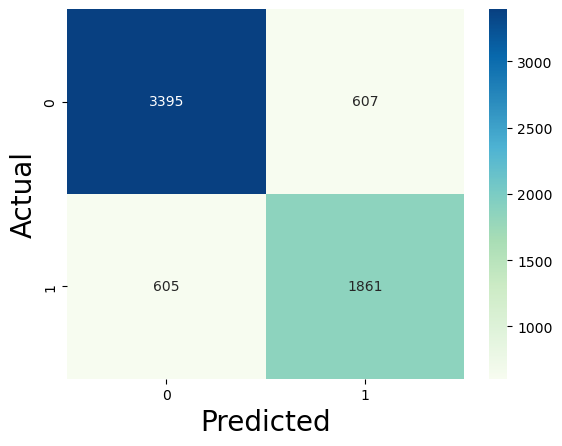

In [155]:
# Plotting confusion matrix:-
sns.heatmap(confusion3, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [156]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8126159554730983

In [157]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [158]:
# Checking the sensitivity of our logistic regression model:-

TP3 /(TP3+FN3)

0.7546634225466342

In [159]:
# Calculating specificity

TN3 /(TN3+FP3)

0.8483258370814593

In [160]:
# Negative predictive value

TN3 /(TN3+ FN3)

0.84875

In [161]:
# Precision/  positive predictive value :

TP3/(TP3+FP3)

0.7540518638573744

In [162]:
# 'Recall' 

TP3/(TP3+FN3)

0.7546634225466342

### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.345 as optimal cutoff point.

## 9. Making Predictions on the Test Set
Let's now make predicitons on the test set

In [165]:
# Re-check final columns from final model
final_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_lead add form', 'Lead Source_olark chat', 'Lead Source_welingak website', 'Do Not Email_yes', 'Last Activity_converted to lead', 'Last Activity_email bounced', 'Last Activity_olark chat conversation', 'Last Activity_sms sent', 'Last Notable Activity_email bounced', 'Last Notable Activity_had a phone conversation', 'Last Notable Activity_unreachable', 'What is your current occupation_working professional'], dtype='object')

In [166]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_landing page submission  Lead Origin_lead add form  Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  Lead Source_pay per click ads  Lead Source_press_release  Lead Source_reference  Lead Source_referral sites  Lead Source_social media  Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  Last Activity_converted to lead  Last Activity_email bounced  Last Activity_email link clicked  Last Activity_email marked spam  Last Activity_email opened  Last Activity_email received  Last Activity_form submitted on website  Last Activity_had a phone conversation  Last Activity_olark chat conversation  \
4269          8.0                         1011                   8.0                                    0                          0                        0                           0                 0                       0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0   
2376          0.0                            0                   0.0                                    0                          1                        0                           0                 0                       0                           0                     0                   0                      0                   0                       0                           0                              0                          0                      1                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0   
7766          5.0                           59                   5.0                                    0                          0                        0                           0                 0                       0                           0                     0                   1                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                    0                             0                             0                           0                 0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0   
9199          0.0                            0                

In [167]:
# Scaling the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [168]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  2772.000000           2772.000000                  2772.000000
mean      0.013430              0.043274                     0.218582
std       0.013964              0.038280                     0.242693
min       0.000000              0.000000                     0.000000
25%       0.003984              0.018182                     0.005722
50%       0.011952              0.036364                     0.113556
75%       0.019920              0.063636                     0.417694
max       0.215139              0.290909                     0.991637

In [169]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[final_col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_lead add form  Lead Source_olark chat  Lead Source_welingak website  Do Not Email_yes  Last Activity_converted to lead  Last Activity_email bounced  Last Activity_olark chat conversation  Last Activity_sms sent  Last Notable Activity_email bounced  Last Notable Activity_had a phone conversation  Last Notable Activity_unreachable  What is your current occupation_working professional
4269     0.031873                     0.444982                          0                       0                             0                 0                                0                            0                                      0                       1                                    0                                               0                                  0                                                  0   
2376     0.000000                     0.000000                          1                       0                             0                 0                                0                            0                                      0                       1                                    0                                               0                                  0                                                  0   
7766     0.019920                     0.025968                          0                       0                             0                 0                                0                            0                                      0                       0                                    0                                               0                                  1                                                  1   
9199     0.000000                     0.000000                          0                       1                             0                 0                                0                            0                                      1                       0                                    0                                               0                                  0                                                  0   
4359     0.000000                     0.000000                          1                       0                             0                 0                                0                            0                                      0                       0                                    0                                               0                                  0                                                  0

In [170]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[final_col])
# Checking X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  Lead Origin_lead add form  Lead Source_olark chat  Lead Source_welingak website  Do Not Email_yes  Last Activity_converted to lead  Last Activity_email bounced  Last Activity_olark chat conversation  Last Activity_sms sent  Last Notable Activity_email bounced  Last Notable Activity_had a phone conversation  Last Notable Activity_unreachable  What is your current occupation_working professional
4269    1.0     0.031873                     0.444982                          0                       0                             0                 0                                0                            0                                      0                       1                                    0                                               0                                  0                                                  0   
2376    1.0     0.000000                     0.000000                          1                       0                             0                 0                                0                            0                                      0                       1                                    0                                               0                                  0                                                  0   
7766    1.0     0.019920                     0.025968                          0                       0                             0                 0                                0                            0                                      0                       0                                    0                                               0                                  1                                                  1   
9199    1.0     0.000000                     0.000000                          0                       1                             0                 0                                0                            0                                      1                       0                                    0                                               0                                  0                                                  0   
4359    1.0     0.000000                     0.000000                          1                       0                             0                 0                                0                            0                                      0                       0                                    0                                               0                                  0                                                  0   
...     ...          ...                          ...                        ...                     ...                           ...               ...                              ...                          ...                                    ...                     ...                                  ...                                             ...                                ...                                                ...   
8649    1.0     0.059761                     0.127641                          0                       0                             0                 0                                0                            0                                      0                       0                                    0                                               0                                  0                                                  0   
2152    1.0     0.000000                     0.000000                          1                       0                             0                 0                                0                            0                                      0                       1                                    0                                               0                            

In [171]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4269    0.718010
2376    0.924543
7766    0.915493
9199    0.069311
4359    0.783076
9186    0.524415
1631    0.414506
8963    0.133293
8007    0.052212
5324    0.296201
dtype: float64

In [172]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.718010
2376  0.924543
7766  0.915493
9199  0.069311
4359  0.783076

In [173]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [174]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.718010
1          1  0.924543
2          1  0.915493
3          0  0.069311
4          1  0.783076

In [176]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Predict_Prob'})
y_pred_final.head()

Converted  Predict_Prob
0          1      0.718010
1          1      0.924543
2          1      0.915493
3          0      0.069311
4          1      0.783076

In [177]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Predict_Prob.map( lambda x: round(x*100))


In [178]:
# Make predictions on the test set using 0.345 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Predict_Prob.map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Converted  Predict_Prob  Lead_Score  final_predicted
0          1      0.718010          72                1
1          1      0.924543          92                1
2          1      0.915493          92                1
3          0      0.069311           7                0
4          1      0.783076          78                1

### Test model evaluation

In [180]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8131313131313131

In [181]:
# Confusion matrix
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1379,  298],
       [ 220,  875]])

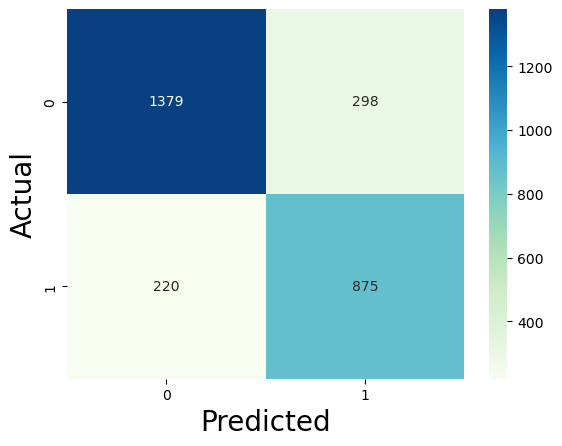

In [182]:
# Plotting confusion matrix:-
sns.heatmap(confusion4, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [183]:
TP4 = confusion4[1,1] # true positive 
TN4 = confusion4[0,0] # true negatives
FP4 = confusion4[0,1] # false positives
FN4 = confusion4[1,0] # false negatives

In [184]:
# Calculating the 'sensitivity'
TP4 / (TP4+FN4)

0.7990867579908676

In [185]:
# Calculating the 'specificity'
TN4 / (TN4+FP4)

0.8223017292784734

In [186]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

FP4/ (TN4+FP4)

0.17769827072152652

In [187]:
# positive predictive value 

TP4 / (TP4+FP4)

0.7459505541346974

In [188]:
# Negative predictive value

TN4 / (TN4+FN4)

0.8624140087554721

###  Precision-Recall

In [190]:
# Calculating 'precision_score'

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7459505541346974

In [191]:
#Calculating 'recall_score'

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7990867579908676

### Observation

The sensitivity value for test data is 79.9% while for train data is 80.3% . The accuracy values is ~ 81.3% Which shows that model is performing well for test data set also.

### Determining top feature based on final model (Model2)

In [194]:
# Displaying parameters obtained by final model 'Model2' res=logm2:

pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params[1:]

TotalVisits                                             5.18
Total Time Spent on Website                             4.53
Lead Origin_lead add form                               3.75
Lead Source_olark chat                                  1.25
Lead Source_welingak website                            1.87
Do Not Email_yes                                       -1.24
Last Activity_converted to lead                        -1.18
Last Activity_email bounced                            -1.41
Last Activity_olark chat conversation                  -1.38
Last Activity_sms sent                                  1.22
Last Notable Activity_email bounced                     1.86
Last Notable Activity_had a phone conversation          3.56
Last Notable Activity_unreachable                       1.79
What is your current occupation_working professional    2.84
dtype: float64

In [195]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

TotalVisits                                            100.00
Total Time Spent on Website                             87.45
Lead Origin_lead add form                               72.43
Lead Source_olark chat                                  24.11
Lead Source_welingak website                            36.03
Do Not Email_yes                                       -23.97
Last Activity_converted to lead                        -22.74
Last Activity_email bounced                            -27.28
Last Activity_olark chat conversation                  -26.60
Last Activity_sms sent                                  23.59
Last Notable Activity_email bounced                     35.88
Last Notable Activity_had a phone conversation          68.66
Last Notable Activity_unreachable                       34.52
What is your current occupation_working professional    54.86
dtype: float64

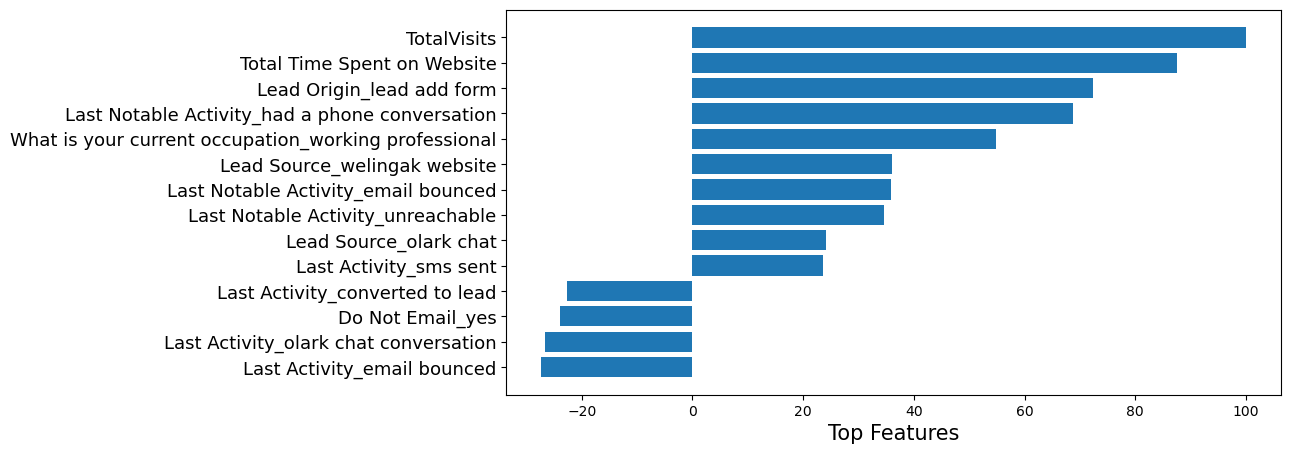

In [196]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation :-

**** Converted = -2.47 + 5.18*'TotalVisits' + 4.53*'Total Time Spent on Website' +3.75*'Lead Origin_lead add form' +1.25*'Lead Source_olark chat' + 1.87*'Lead Source_welingak website' -1.24*'Do Not Email_yes' -1.18*'Last Activity_converted to lead' - 1.41*'Last Activity_email bounce' -1.38*'Last Activity_olark chat conversation' +1.22*'Last Activity_sms sent' +1.86*'Last Notable Activity_email bounced' +3.56*'Last Notable Activity_had a phone conversation' +1.79*'Last Notable Activity_unreachable' + 2.84*'What is your current occupation_working professional'

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1. Total Visits:
   If customer more and more visit the websites, they're potential lead.
   
2. Total time spent on website
    Leads spending more time on website can be our potential lead.
   
3. Lead Origin: Lead add form
   Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.
   
4. Last Notable Activity_had a phone conversation
     if last notable activity is phone converstation, it has a higher chances to convert leads.

5. What is your current occupation: working professional
   The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals and try to get more number of leads.
   
6. Lead source: welinkak website :
   As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

7. Last Notable Activity_email bounced  
   if last notable activity is email bounced, it also has a higher chances to convert leads.

8. Last Notable Activity_unreachable
  if last notable activity is unreachble, it also has a higher chances to convert leads. However, It has no business sense so it seems like a small flaw in the model.
   
9. Lead source: Olark chat
   As conversion rate is higher for those leads who got to know about course from 'Olark chat',so company can focus on this website to get more number of potential leads.
   
10. Last Activity_sms sent
    Leads have last activity is sms sent, it also has a higher chances to convert leads
   
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.